# *Satish Ghosle*
## *Real Time Logistics Regression ML Model*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_df = pd.read_csv("/kaggle/input/Churn_Modelling.csv")
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
churn_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
churn_df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)
churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
churn_copy_df = churn_df

### Pickle

In [8]:
import pickle
def save_operations(operation_obj, operation_name):
    pickle_path_obj = open(f"/kaggle/working/{operation_name}.pck","wb")
    pickle.dump(operation_obj,pickle_path_obj)
    pickle_path_obj.close()

### Encodings

In [9]:
churn_df.select_dtypes("object").columns

Index(['Geography', 'Gender'], dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
le_obj = LabelEncoder()
churn_df["Gender"] = le_obj.fit_transform(churn_df.Gender)
save_operations(le_obj, "Gender_Label_Enc")

In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe_obj = OneHotEncoder()
geo_ohe = ohe_obj.fit_transform(churn_df.Geography.to_frame()) 
geo_ohe_arr = geo_ohe.toarray()
geo_ohe_arr

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [12]:
ohe_obj.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [13]:
ohe_obj.categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [14]:
ohe_obj.categories_[0]

array(['France', 'Germany', 'Spain'], dtype=object)

In [15]:
geo_ohe_df = pd.DataFrame(geo_ohe_arr, columns = ohe_obj.categories_[0])
geo_ohe_df

,France,Germany,Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [16]:
churn_enc_df = pd.concat((churn_df, geo_ohe_df), axis = 1)
churn_enc_df.drop("Geography", axis = 1, inplace = True)
churn_enc_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [17]:
save_operations(ohe_obj,"Geography_Ohe_Enc")

### Data Split

In [18]:
X = churn_enc_df.drop("Exited",axis = 1)
Y = churn_enc_df["Exited"]

In [19]:
save_operations(X.columns, "Independent_Cols_Names")

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of Y_train", Y_train.shape)
print("Shape of Y_test", Y_test.shape)

Shape of X_train (8000, 12)
Shape of X_test (2000, 12)
Shape of Y_train (8000,)
Shape of Y_test (2000,)


In [21]:
# Standardize the Independent Variables
from sklearn.preprocessing import StandardScaler

std_scaler_obj = StandardScaler()
X_train = std_scaler_obj.fit_transform(X_train)
X_test = std_scaler_obj.transform(X_test)

### Check Mean and Standard Deviation of Test Set after the Standardization

Text(0.5, 1.0, 'Standard Deviation of X_test')

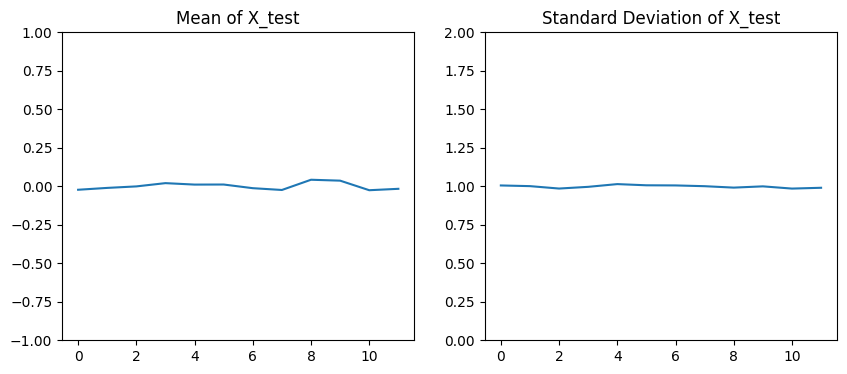

In [22]:
# Check if Mean of X_test is 0
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1,2,1)
plt.ylim(-1,1)
mean_test_set = []
for col in range(X.shape[1]):
    mean_test_set.append(np.mean(X_test[:,col]))
plt.plot(mean_test_set)
plt.title("Mean of X_test")


# Check if Standard Deviation of X_test is 1
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1,2,2)
plt.ylim(0,2)
std_dev_test_set = []
for col in range(X.shape[1]):
    std_dev_test_set.append(np.std(X_test[:,col]))
plt.plot(std_dev_test_set)
plt.title("Standard Deviation of X_test")

In [23]:
save_operations(std_scaler_obj,"Std_Scaler_Obj")

### Create Logistic Regression Model with RFECV

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

log_reg_model_obj1 = LogisticRegression()
rfecv_obj = RFECV(log_reg_model_obj1, step = 1, min_features_to_select= 6, n_jobs = -1)
rfecv_obj.fit(X_train, Y_train)
print("Score of RFECV Logistic Regression",rfecv_obj.score(X_test, Y_test))

Score of RFECV Logistic Regression 0.824


In [25]:
rfecv_obj.support_

array([False,  True,  True, False,  True, False, False,  True, False,
        True,  True, False])

In [26]:
rfecv_obj.ranking_

array([7, 1, 1, 4, 1, 3, 5, 1, 6, 1, 1, 2])

In [27]:
selected_features = np.where(rfecv_obj.support_)[0]
selected_features

array([ 1,  2,  4,  7,  9, 10])

In [28]:
X_train = X_train[:,selected_features]
X_test = X_test[:,selected_features]

In [29]:
log_reg_model_obj1.fit(X_train, Y_train)
print("Score of Logistic Regression after RFECV =", log_reg_model_obj1.score(X_test, Y_test))

Score of Logistic Regression after RFECV = 0.824


In [30]:
save_operations(rfecv_obj,"RFECV_Model_Obj")
save_operations(log_reg_model_obj1,"Log_Reg1_Model_Obj")


In [31]:
# def sigmoid(linear_reg_eqn):
#     return 1/(np.exp(-linear_reg_eqn))
    

In [32]:
log_reg_model_obj1.predict(X_test[10,:].reshape(1,-1))

array([0])

### Store Predictions

In [33]:
Y_pred = log_reg_model_obj1.predict(X_test)

### Store Predictions' Probabilities

In [34]:
pred_prob = log_reg_model_obj1.predict_proba(X_test)

# We want the probability of predictions of only churned case i.w. index/label 1 only
pred_prob_yes = pred_prob[:,1]

### Logistic Regression Model's Metrics

> #### Accuracy

In [35]:
def cal_accuracy(actual_vals, pred_vals):
    return np.mean(actual_vals == pred_vals)

In [36]:
# Calculate Accuracy
print(cal_accuracy(Y_test, Y_pred))

0.824


> #### Confusion Matrix

[[1554   50]
 [ 302   94]]


<Axes: >

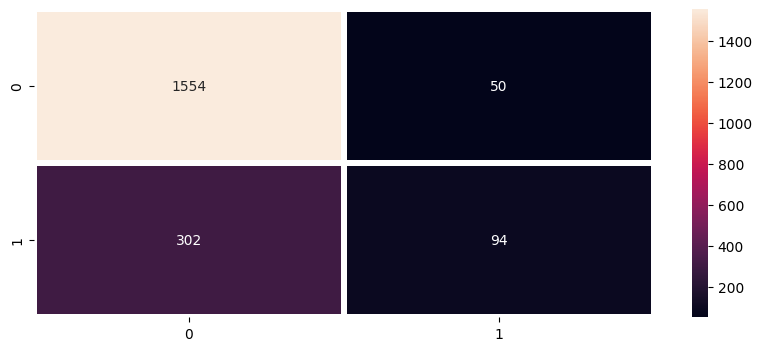

In [37]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = "d", linewidths = 4)

> #### Precision

In [38]:
def cal_precision(label, conf_mat):
    tp = conf_mat[label,label]
    result = tp/sum(conf_mat[:,label])
    return result

In [39]:
# Calculate Precision
cal_precision(1,conf_matrix)

0.6527777777777778

> #### Recall / Sensitivity

In [40]:
def cal_recall(label, conf_mat):
    tp = conf_mat[label,label]
    result = tp/(sum(conf_mat[label,:]))
    return result

In [41]:
# Calculate Recall
cal_recall(1,conf_matrix)

0.23737373737373738

> #### ROC

Shape of False Positive Rate = (629,)
Shape of True Positive Rate = (629,)
Shape of Threshold = (629,)


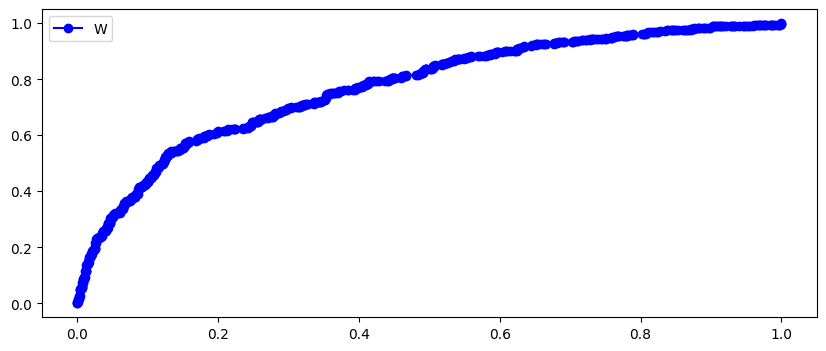

In [42]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(Y_test,pred_prob_yes)
print("Shape of False Positive Rate =",fpr.shape)
print("Shape of True Positive Rate =",tpr.shape)
print("Shape of Threshold =",threshold.shape)

# Plot ROC Curve

plt.plot(fpr, tpr, marker = "o", color = "blue")
plt.legend("Without Class Weights")

> #### AUC

In [43]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(Y_test, pred_prob_yes))

0.7712473865840449


In [44]:
# Consolidate all the metrics
print("Accuracy of Prediction / Model =",cal_accuracy(Y_test, Y_pred))
print("Confusion Matrix =",conf_matrix)
print("Precision =",cal_precision(1,conf_matrix))
print("Recall =",cal_recall(1,conf_matrix))
print("AUC Score =",roc_auc_score(Y_test, pred_prob_yes))

Accuracy of Prediction / Model = 0.824
Confusion Matrix = [[1554   50]
 [ 302   94]]
Precision = 0.6527777777777778
Recall = 0.23737373737373738
AUC Score = 0.7712473865840449


## Making the Class Weight Balanced

In [45]:
churn_df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [46]:
class_label_count_dict = dict(churn_df.Exited.value_counts())
class_label_count_dict

{0: 7963, 1: 2037}

In [47]:
# Inverse the percentage of the class labels
for label, count in class_label_count_dict.items():
    class_label_count_dict[label] = count/len(churn_df)
class_label_count_dict

{0: 0.7963, 1: 0.2037}

In [48]:
# Swap the label Weights

class_label_count_dict[0], class_label_count_dict[1] = class_label_count_dict[1], class_label_count_dict[0]
class_label_count_dict

# OR

# for label, count in class_label_count_dict.items():
#     # class_label_count_dict[label] = len(churn_df) - inverse of percentages of class weights
#     class_label_count_dict[label] = sum(class_label_count_dict.values) - count/sum(class_label_count_dict.values)

{0: 0.2037, 1: 0.7963}

### Recreate the Logistic Regression Model with Balanced Class Weights

In [49]:
# pass class_label_count_dict to Logistic Regression as Hyperparameter
log_reg_balanced_model_obj = LogisticRegression(class_weight = class_label_count_dict)
log_reg_balanced_model_obj.fit(X_train, Y_train)
print("Score of Logistic Regression on Balanced Class =", log_reg_balanced_model_obj.score(X_test, Y_test))

Score of Logistic Regression on Balanced Class = 0.707


In [50]:
# Store Balanced Class Weight's Predictions
Y_balanced_pred = log_reg_balanced_model_obj.predict(X_test)

# Store Balanced Class Weight's Probabilities of Predictions
balanced_pred_prob = log_reg_balanced_model_obj.predict_proba(X_test)

# Store Balanced Class Weight's Probabilities of Predictions of YES / 1 only.
balanced_pred_prob_yes = balanced_pred_prob[:,1]

Confusion Matrix of Balanced Class Weight [[1136  468]
 [ 118  278]]


<Axes: >

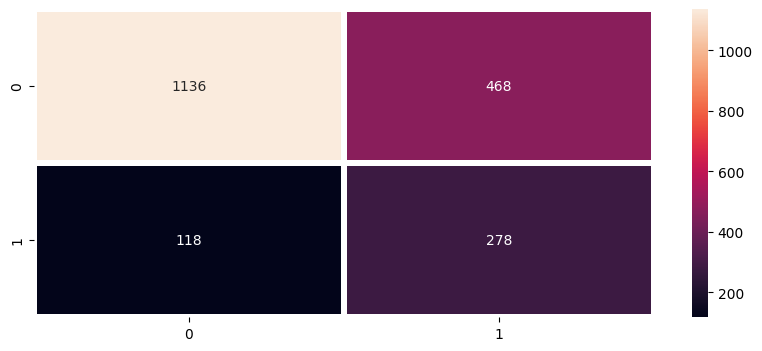

In [51]:
# Calculate the Confusion Matrix again
conf_matrix = confusion_matrix(Y_test,Y_balanced_pred)
print("Confusion Matrix of Balanced Class Weight", conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = "d", linewidths = 4)

### Re-calculate all the Metrics of the Balanced Logistic Regression Model

In [52]:
# Consolidate all the metrics
print("Accuracy of Prediction / Model =",cal_accuracy(Y_test, Y_balanced_pred))
print("Confusion Matrix =",conf_matrix)
print("Precision =",cal_precision(1,conf_matrix))
print("Recall =",cal_recall(1,conf_matrix))
print("AUC Score =",roc_auc_score(Y_test, balanced_pred_prob_yes))

Accuracy of Prediction / Model = 0.707
Confusion Matrix = [[1136  468]
 [ 118  278]]
Precision = 0.3726541554959786
Recall = 0.702020202020202
AUC Score = 0.7743394040152145


### Save Balanced Class Weight's Model

In [53]:
save_operations(log_reg_balanced_model_obj,"Balanced_Log_Reg_Model_Obj")

# Real Time Prediction of Logistic Regression

> ### Method to Load Operations

In [54]:
def load_operations(name):
    pickle_path_obj = open(f"/kaggle/working/{name}.pck","rb")
    return pickle.load(pickle_path_obj)

> ### Read a Random Data from the Dataset

In [55]:
churn_data_df = pd.read_csv("/kaggle/input/Churn_Modelling.csv")
churn_data_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [56]:
# Pick a random data point from the dataset
index_to_be_pred = np.random.choice(len(churn_data_df))
data_to_be_pred = churn_data_df.iloc[index_to_be_pred,:]
data_to_be_pred_df = data_to_be_pred.to_frame().T
data_to_be_pred_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2211,2212,15641850,Pethard,717,France,Male,40,0,98241.04,1,1,0,110887.14,0


In [57]:
data_to_be_pred_df.index

Index([2211], dtype='int64')

> ### Encodings

In [58]:
# Label Encoder
data_to_be_pred_df.Gender = load_operations("Gender_Label_Enc").transform(data_to_be_pred_df.Gender)

In [59]:
data_to_be_pred_df.Geography

2211    France
Name: Geography, dtype: object

In [60]:
# OneHorEncoder
geo_ohe_data = load_operations("Geography_Ohe_Enc").transform(data_to_be_pred_df.Geography.to_frame())
geo_ohe_data_arr = geo_ohe_data.toarray()
geo_ohe_data_arr

array([[1., 0., 0.]])

In [61]:
# Get the OneHotEncoder's column names
load_operations("Geography_Ohe_Enc").categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [62]:
geo_ohe_tx_df = pd.DataFrame(geo_ohe_data_arr,
                             index = [index_to_be_pred],
                             columns = load_operations("Geography_Ohe_Enc").categories_[0])
geo_ohe_tx_df

,France,Germany,Spain
2211,1.0,0.0,0.0


> ### Prepare final transformed DataFrame

In [63]:
data_to_be_pred_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2211,2212,15641850,Pethard,717,France,1,40,0,98241.04,1,1,0,110887.14,0


In [64]:
data_to_be_pred_df = pd.concat((data_to_be_pred_df,geo_ohe_tx_df), axis = 1)
data_to_be_pred_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
2211,2212,15641850,Pethard,717,France,1,40,0,98241.04,1,1,0,110887.14,0,1.0,0.0,0.0


> ### Store Real Output for reference and validation

In [65]:
real_output = data_to_be_pred_df["Exited"]
real_output

2211    0
Name: Exited, dtype: object

> ### Get only columns which our model was trained on

In [66]:
col_sequence = load_operations("Independent_Cols_Names")
col_sequence

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France', 'Germany',
       'Spain'],
      dtype='object')

> ### Reset our data_to_be_pred_df as per columns which our model was trained on

In [67]:
data_to_be_pred_df = data_to_be_pred_df[col_sequence]
data_to_be_pred_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
2211,717,1,40,0,98241.04,1,1,0,110887.14,1.0,0.0,0.0


### Data Split

In [68]:
X = data_to_be_pred_df
Y = data_to_be_pred["Exited"]

> ### Standardize the Independent Data

In [69]:
X = load_operations("Std_Scaler_Obj").transform(X)

> ### Load and transform the RFECV Model with Logistic Regression

In [70]:
load_operations("RFECV_Model_Obj").transform(X)

array([[ 0.9104886 ,  0.10234774,  0.35185708, -1.03563452,  1.00451017,
        -0.5821616 ]])

In [71]:
X = load_operations("RFECV_Model_Obj").transform(X)
X

array([[ 0.9104886 ,  0.10234774,  0.35185708, -1.03563452,  1.00451017,
        -0.5821616 ]])

> ### Prediction using RFECV Logistic Regression

In [72]:
load_operations("Log_Reg1_Model_Obj").predict(X)

array([0])

In [73]:
real_output

2211    0
Name: Exited, dtype: object

> ### Prediction using Balanced Class Weights' RFECV Logistic Regression

In [74]:
load_operations("Balanced_Log_Reg_Model_Obj").predict(X)

array([0])

> ### Compare Real and Predicted Output

In [75]:
real_output.values == load_operations("Balanced_Log_Reg_Model_Obj").predict(X)

array([ True])